# <p style="background-color:green;font-family:newtimeroman;font-size:200%;color:white;text-align:center;border-radius:20px 20px;"><b>Startups Project</b></p>


# Lets Understand some of the most Interesting Patterns of Funding Startups.

**How Does the Funding Ecosystem changes with respect to Time?**

**What is the General Amount that Startups get in India?**

**Which Kind of Industries are more preferred for Startups?**

**Does Location also play a role, In determining the Growth of a Startup?**

**Who plays the main role in Indian Startups Ecosystem?**

**What are the different Types of Funding for Startups?**

# Data Reading & Cleaning

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

In [5]:
sf_df = pd.read_csv('startup_funding.csv')
sf_df

,Sr No,Date dd/mm/yyyy,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,InvestmentnType,Amount in USD,Remarks
0,1,09/01/2020,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,"20,00,00,000",NaN
1,2,13/01/2020,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,"80,48,394",NaN
2,3,09/01/2020,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,"1,83,58,860",NaN
3,4,02/01/2020,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,"30,00,000",NaN
4,5,02/01/2020,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,"18,00,000",NaN
...,...,...,...,...,...,...,...,...,...,...
3039,3040,29/01/2015,Printvenue,NaN,NaN,NaN,Asia Pacific Internet Group,Private Equity,"45,00,000",NaN
3040,3041,29/01/2015,Graphene,NaN,NaN,NaN,KARSEMVEN Fund,Private Equity,"8,25,000",Govt backed VC Fund
3041,3042,30/01/2015,Mad Street Den,NaN,NaN,NaN,"Exfinity Fund, GrowX Ventures.",Private Equity,"15,00,000",NaN
3042,3043,30/01/2015,Simplotel,NaN,NaN,NaN,MakeMyTrip,Private Equity,NaN,"Strategic Funding, Minority stake"


In [6]:
sf_df.shape

(3044, 10)

In [7]:
sf_df.head()

,Sr No,Date dd/mm/yyyy,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,InvestmentnType,Amount in USD,Remarks
0,1,09/01/2020,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,"20,00,00,000",NaN
1,2,13/01/2020,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,"80,48,394",NaN
2,3,09/01/2020,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,"1,83,58,860",NaN
3,4,02/01/2020,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,"30,00,000",NaN
4,5,02/01/2020,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,"18,00,000",NaN


In [8]:
sf_df.columns

Index(['Sr No', 'Date dd/mm/yyyy', 'Startup Name', 'Industry Vertical',
       'SubVertical', 'City  Location', 'Investors Name', 'InvestmentnType',
       'Amount in USD', 'Remarks'],
      dtype='object')

In [9]:
sf_df.columns = ['sr_no', 'date', 'startup_name', 'industry_vertical', 'subvertical', 'city_location', 'investors_name',
                'investment_type', 'amount_in_usd', 'remarks']
sf_df.columns

Index(['sr_no', 'date', 'startup_name', 'industry_vertical', 'subvertical',
       'city_location', 'investors_name', 'investment_type', 'amount_in_usd',
       'remarks'],
      dtype='object')

In [10]:
sf_df.head()

,sr_no,date,startup_name,industry_vertical,subvertical,city_location,investors_name,investment_type,amount_in_usd,remarks
0,1,09/01/2020,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,"20,00,00,000",NaN
1,2,13/01/2020,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,"80,48,394",NaN
2,3,09/01/2020,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,"1,83,58,860",NaN
3,4,02/01/2020,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,"30,00,000",NaN
4,5,02/01/2020,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,"18,00,000",NaN


In [11]:
sf_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3044 entries, 0 to 3043
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   sr_no              3044 non-null   int64 
 1   date               3044 non-null   object
 2   startup_name       3044 non-null   object
 3   industry_vertical  2873 non-null   object
 4   subvertical        2108 non-null   object
 5   city_location      2864 non-null   object
 6   investors_name     3020 non-null   object
 7   investment_type    3040 non-null   object
 8   amount_in_usd      2084 non-null   object
 9   remarks            419 non-null    object
dtypes: int64(1), object(9)
memory usage: 237.9+ KB


In [12]:
# Clean and convert 'amount in usd' to numeric
sf_df['amount_in_usd'] = sf_df['amount_in_usd'].replace({',': '', '$': ''}, regex=True)
sf_df['amount_in_usd'] = pd.to_numeric(sf_df['amount_in_usd'], errors='coerce')

In [13]:
sf_df['date'] = pd.to_datetime(sf_df['date'], errors='coerce', dayfirst=True)


In [14]:
invalid_dates = sf_df[sf_df['date'].isna()]
invalid_dates

,sr_no,date,startup_name,industry_vertical,subvertical,city_location,investors_name,investment_type,amount_in_usd,remarks
192,193,NaT,Loan Tap,Consumer Internet,Online Lending Platform For Salaried Professio...,Mumbai,"Shunwei Capital, Tuscan Ventures, Ashish Goenk...",Private Equity,6250000.0,NaN
2571,2572,NaT,HandyHome,Hyperlocal Electronics repair Service,NaN,Mumbai,"Bessemer Ventures, Kae Capital",Seed Funding,630000.0,NaN
2606,2607,NaT,\\xc2\\xa0Infinity Assurance,\\xc2\\xa0Warranty Programs Service Administra...,NaN,\\xc2\\xa0New Delhi,\\xc2\\xa0Indian Angel Network,Seed Funding,NaN,NaN
2775,2776,NaT,Mobiefit,Mobile Fitness App,NaN,Goa,Prototyze,Seed Funding,NaN,NaN
2776,2777,NaT,Plancess,Online Education Platform,NaN,Mumbai,"Rajendra Gogri,\\xc2\\xa0 Chandrakant Gogri",Seed Funding,2000000.0,NaN
2831,2832,NaT,The Porter,Logistics Tech,NaN,Mumbai,Kae Capital,Seed Funding,500000.0,NaN
3011,3012,NaT,Wishberry,NaN,NaN,NaN,"Rajan Anandan, Shankar Mahadevan, Deep Kalra &...",Seed Funding,650000.0,NaN
3029,3030,NaT,Corporate360,NaN,NaN,NaN,Group of Angel Investors,Seed Funding,200000.0,NaN


In [15]:
sf_df.head()

,sr_no,date,startup_name,industry_vertical,subvertical,city_location,investors_name,investment_type,amount_in_usd,remarks
0,1,2020-01-09,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,200000000.0,NaN
1,2,2020-01-13,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,8048394.0,NaN
2,3,2020-01-09,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,18358860.0,NaN
3,4,2020-01-02,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,3000000.0,NaN
4,5,2020-01-02,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,1800000.0,NaN


In [ ]:
sf_df.dropna(subset=['date'], inplace=True) # Drop 'date'columns with NaN values

In [17]:
sf_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3036 entries, 0 to 3043
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   sr_no              3036 non-null   int64         
 1   date               3036 non-null   datetime64[ns]
 2   startup_name       3036 non-null   object        
 3   industry_vertical  2867 non-null   object        
 4   subvertical        2107 non-null   object        
 5   city_location      2858 non-null   object        
 6   investors_name     3012 non-null   object        
 7   investment_type    3032 non-null   object        
 8   amount_in_usd      2059 non-null   float64       
 9   remarks            419 non-null    object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(7)
memory usage: 260.9+ KB


In [18]:
sf_df.isnull().sum()[sf_df.isnull().sum() > 0]

industry_vertical     169
subvertical           929
city_location         178
investors_name         24
investment_type         4
amount_in_usd         977
remarks              2617
dtype: int64

In [19]:
sf_df['industry_vertical'].value_counts()

industry_vertical
Consumer Internet                        940
Technology                               478
eCommerce                                186
Healthcare                                70
Finance                                   62
                                        ... 
Rental Accommodation Search platform       1
Developer Portfolio Showcase platform      1
Doctors Network Mobile App                 1
End-to-End Lending platform                1
Online Travel Marketplace                  1
Name: count, Length: 819, dtype: int64

In [20]:
sf_df['industry_vertical'].mode()[0]

'Consumer Internet'

In [21]:
sf_df['industry_vertical'].fillna(sf_df['industry_vertical'].mode()[0], inplace=True)

In [22]:
sf_df['subvertical'].value_counts()

subvertical
Online Lending Platform                       11
Online Pharmacy                               10
Food Delivery Platform                         8
Online lending platform                        5
Online Education Platform                      5
                                              ..
Tech driven Insurance platform                 1
CSR and sustainability management platform     1
Location tracking solutions                    1
Online insurance brokerage platform            1
Interior Design Marketplace                    1
Name: count, Length: 1941, dtype: int64

In [23]:
sf_df['subvertical'].fillna(sf_df['subvertical'].mode()[0], inplace=True)

In [24]:
sf_df['city_location'].unique()

array(['Bengaluru', 'Gurgaon', 'New Delhi', 'Mumbai', 'Chennai', 'Pune',
       'Noida', 'Faridabad', 'San Francisco', 'San Jose,', 'Amritsar',
       'Delhi', 'Kormangala', 'Tulangan', 'Hyderabad', 'Burnsville',
       'Menlo Park', 'Gurugram', 'Palo Alto', 'Santa Monica', 'Singapore',
       'Taramani', 'Andheri', 'Chembur', 'Nairobi', 'Haryana', 'New York',
       'Karnataka', 'Mumbai/Bengaluru', 'Bhopal',
       'Bengaluru and Gurugram', 'India/Singapore', 'Jaipur', 'India/US',
       'Nagpur', 'Indore', 'New York, Bengaluru', 'California', 'India',
       'Ahemadabad', 'Rourkela', 'Srinagar', 'Bhubneswar', 'Chandigarh',
       'Delhi & Cambridge', 'Kolkatta', 'Kolkata', 'Coimbatore',
       'Bangalore', 'Udaipur', nan, 'Ahemdabad', 'Bhubaneswar',
       'Ahmedabad', 'Surat', 'Goa', 'Uttar Pradesh', 'Nw Delhi', 'Gaya',
       'Vadodara', 'Trivandrum', 'Missourie', 'Panaji', 'Gwalior',
       'Karur', 'Udupi', 'Kochi', 'Agra', 'Bangalore/ Bangkok', 'Hubli',
       'Kerala', 'Kozhiko

In [25]:
sf_df['city_location'].value_counts()

city_location
Bangalore             700
Mumbai                563
New Delhi             421
Gurgaon               287
Bengaluru             141
                     ... 
Delhi & Cambridge       1
Bhubneswar              1
Srinagar                1
Rourkela                1
Dallas / Hyderabad      1
Name: count, Length: 112, dtype: int64

In [26]:
# Replace 'Bengaluru' with 'Bangalore' in 'city_location' column
sf_df['city_location'] = sf_df['city_location'].replace('Bengaluru', 'Bangalore')

In [27]:
# Replace 'Kolkatta' with 'Kolkata' in 'city_location' column
sf_df['city_location'] = sf_df['city_location'].replace('Kolkatta', 'Kolkata')

In [28]:
sf_df['city_location'].value_counts()

sf_df['city_location'].fillna(sf_df['city_location'].mode()[0], inplace=True)

In [29]:
sf_df.isnull().sum()[sf_df.isnull().sum() > 0]

investors_name       24
investment_type       4
amount_in_usd       977
remarks            2617
dtype: int64

In [30]:
sf_df['investors_name'].value_counts()

investors_name
Undisclosed Investors                                                                                                                                               39
Undisclosed investors                                                                                                                                               30
Ratan Tata                                                                                                                                                          25
Indian Angel Network                                                                                                                                                23
Kalaari Capital                                                                                                                                                     16
                                                                                                                                                      

In [31]:
sf_df['investors_name'] = sf_df['investors_name'].replace(['Undisclose investors', 'Undisclosed', 'Not Disclosed', 'Undisclosed Investors', 
                                                           'Undisclosed Investor', 'Undisclosed investors', 'Undisclosed investor'], 'Undisclosed Investors')

In [32]:
# This column represents essential information, so 'unkown' is the best.
sf_df['investors_name'].fillna('Unknown', inplace=True)

In [33]:
sf_df['investment_type'].value_counts()

investment_type
Private Equity                 1355
Seed Funding                   1348
Seed/ Angel Funding              60
Seed / Angel Funding             47
Seed\\nFunding                   30
Debt Funding                     25
Series A                         24
Seed/Angel Funding               23
Series B                         20
Series C                         14
Series D                         12
Angel / Seed Funding              8
Seed Round                        7
Pre-Series A                      4
Private Equity Round              4
Seed                              4
Seed / Angle Funding              3
pre-Series A                      2
Venture Round                     2
Equity                            2
Corporate Round                   2
Series E                          2
Series F                          2
Private                           1
Debt-Funding                      1
Term Loan                         1
Seed funding                      1
PrivateEquit

In [34]:
sf_df.dropna(subset = ['investment_type'], inplace=True)

In [35]:
sf_df.isnull().sum()[sf_df.isnull().sum() > 0]

amount_in_usd     976
remarks          2613
dtype: int64

In [36]:
sf_df['amount_in_usd'].fillna(sf_df['amount_in_usd'].median(), inplace=True)

In [37]:
sf_df['remarks'].fillna('No Remarks', inplace=True)

In [38]:
sf_df.isnull().sum()

sr_no                0
date                 0
startup_name         0
industry_vertical    0
subvertical          0
city_location        0
investors_name       0
investment_type      0
amount_in_usd        0
remarks              0
dtype: int64

In [39]:
sf_df.head()

,sr_no,date,startup_name,industry_vertical,subvertical,city_location,investors_name,investment_type,amount_in_usd,remarks
0,1,2020-01-09,BYJU’S,E-Tech,E-learning,Bangalore,Tiger Global Management,Private Equity Round,200000000.0,No Remarks
1,2,2020-01-13,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,8048394.0,No Remarks
2,3,2020-01-09,Mamaearth,E-commerce,Retailer of baby and toddler products,Bangalore,Sequoia Capital India,Series B,18358860.0,No Remarks
3,4,2020-01-02,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,3000000.0,No Remarks
4,5,2020-01-02,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,1800000.0,No Remarks


# How Does the Funding Ecosystem changes with respect to Time?

In [41]:
# Set 'date' as index for easier time series analysis
sf_df.set_index('date', inplace=True)

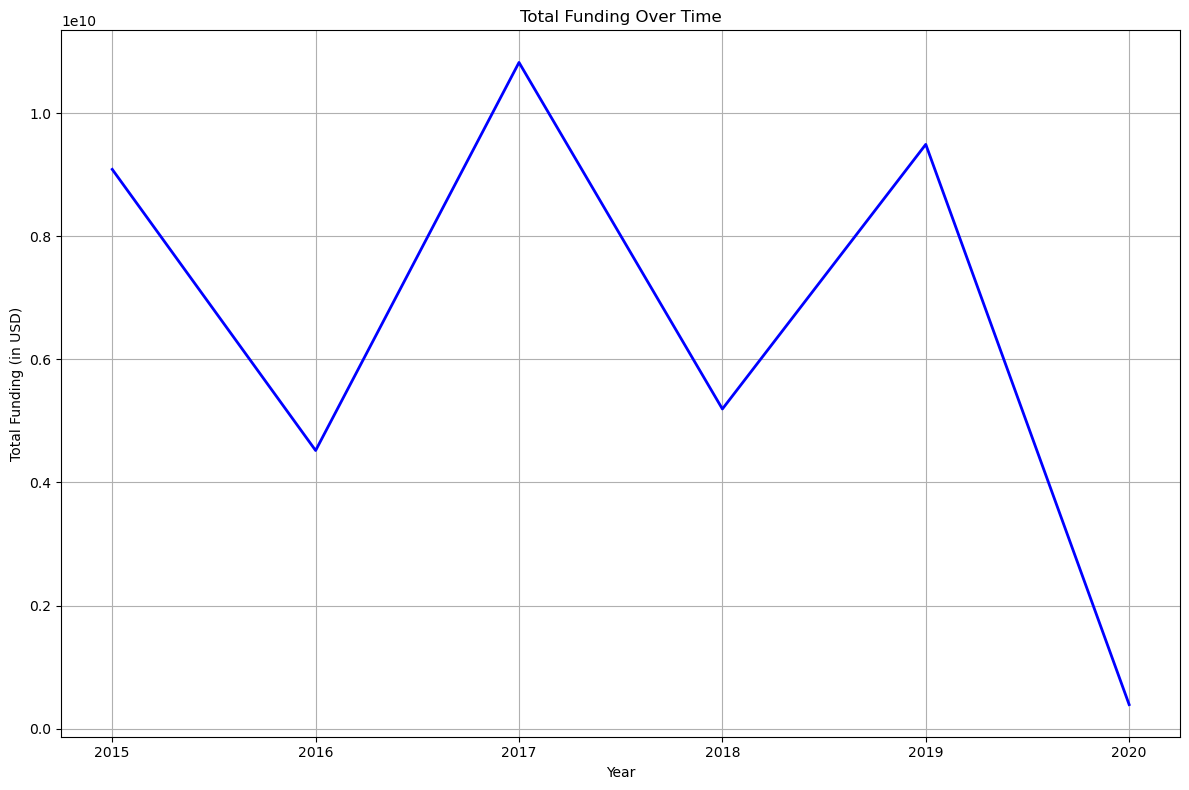

In [42]:
total_funding_over_time = sf_df.groupby(sf_df.index.year)['amount_in_usd'].sum()

# Plot total funding over time
total_funding_over_time.plot(kind='line', figsize=(12, 8), color='b', lw=2)
plt.title("Total Funding Over Time")
plt.xlabel("Year")
plt.ylabel("Total Funding (in USD)")
plt.grid(True)
plt.tight_layout()
plt.show()

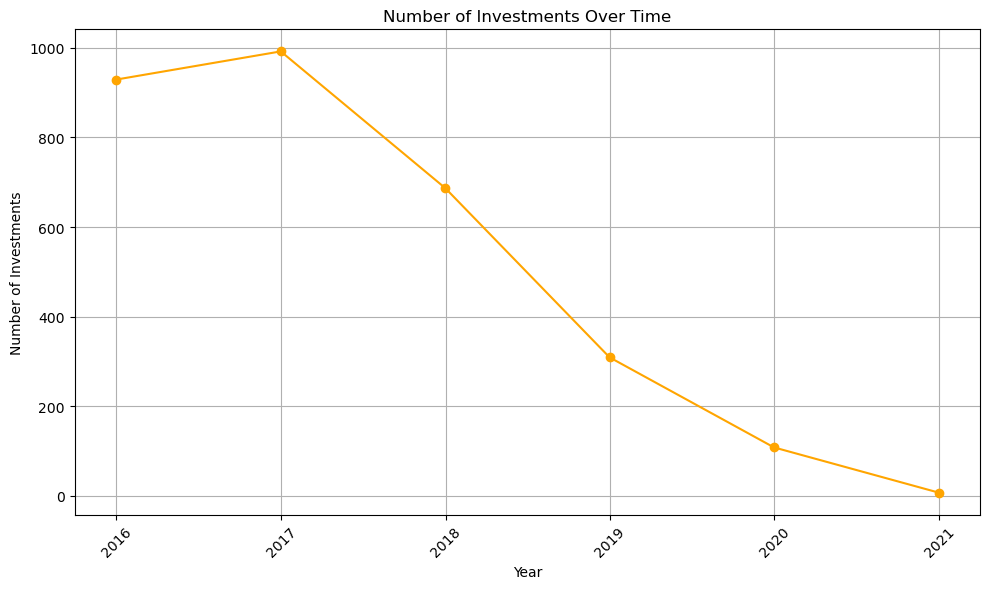

In [43]:
# Number of investments over time
# Count the number of investments per year
investments_over_time = sf_df.resample('Y').size()

# Plot number of investments over time
plt.figure(figsize=(10,6))
plt.plot(investments_over_time.index, investments_over_time.values, marker='o', color='orange')
plt.title("Number of Investments Over Time")
plt.xlabel("Year")
plt.ylabel("Number of Investments")
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

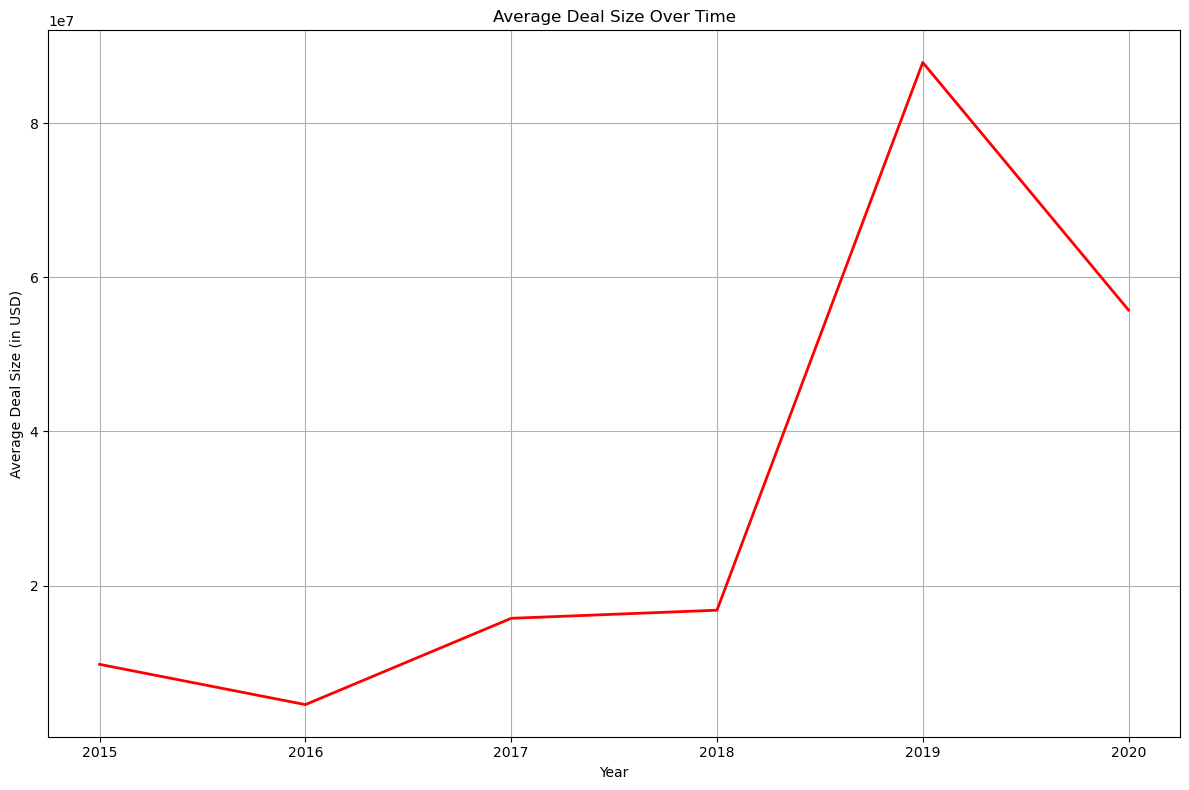

In [44]:
# Calculate average deal size per year
average_deal_size_by_year = sf_df.groupby(sf_df.index.year)['amount_in_usd'].mean()

# Plot the average deal size over time
average_deal_size_by_year.plot(kind='line', figsize=(12, 8), color='r', lw=2)
plt.title("Average Deal Size Over Time")
plt.xlabel("Year")
plt.ylabel("Average Deal Size (in USD)")
plt.grid(True)
plt.tight_layout()
plt.show()

# What is the General Amount that Startups get in India?

In [46]:
# Calculate the general funding amount (mean or median)
average_total_funding = sf_df['amount_in_usd'].mean()
average_total_funding

13027400.677440634

In [47]:
median_total_funding = sf_df['amount_in_usd'].median()
median_total_funding

1700000.0

# Which Kind of Industries are more preferred for Startups?

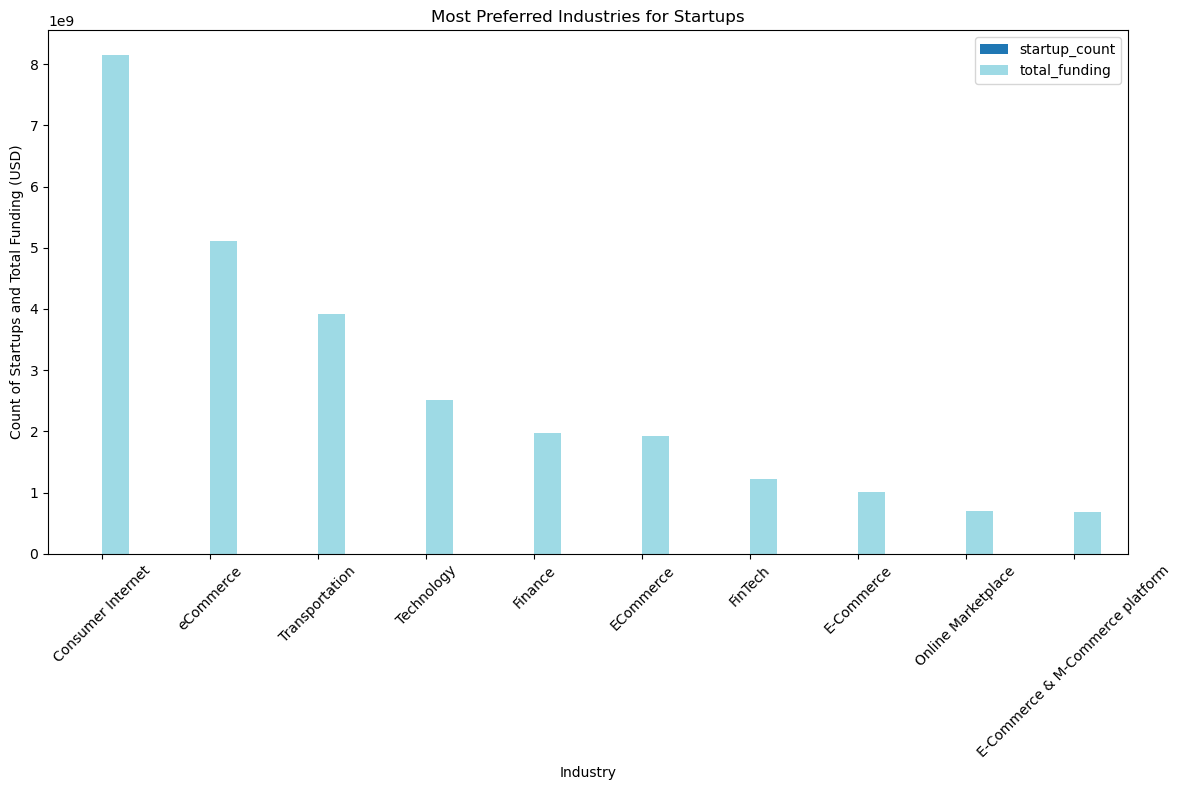

In [49]:
# Count the number of startups in each industry
industry_counts = sf_df['industry_vertical'].value_counts()

# Calculate total funding by industry
industry_funding = sf_df.groupby('industry_vertical')['amount_in_usd'].sum()

# Combine the two metrics (number of startups and total funding)
industry_summary = pd.DataFrame({
    'startup_count': industry_counts,
    'total_funding': industry_funding
})

# Sort industries by the total funding and number of startups
industry_summary_sorted = industry_summary.sort_values(by=['total_funding', 'startup_count'], ascending=False)

# Plot the top industries with the most startups and funding
industry_summary_sorted.head(10).plot(kind='bar', figsize=(12, 8), stacked=False, colormap='tab20')
plt.title("Most Preferred Industries for Startups")
plt.xlabel("Industry")
plt.ylabel("Count of Startups and Total Funding (USD)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Does Location also play a role, In determining the Growth of a Startup?

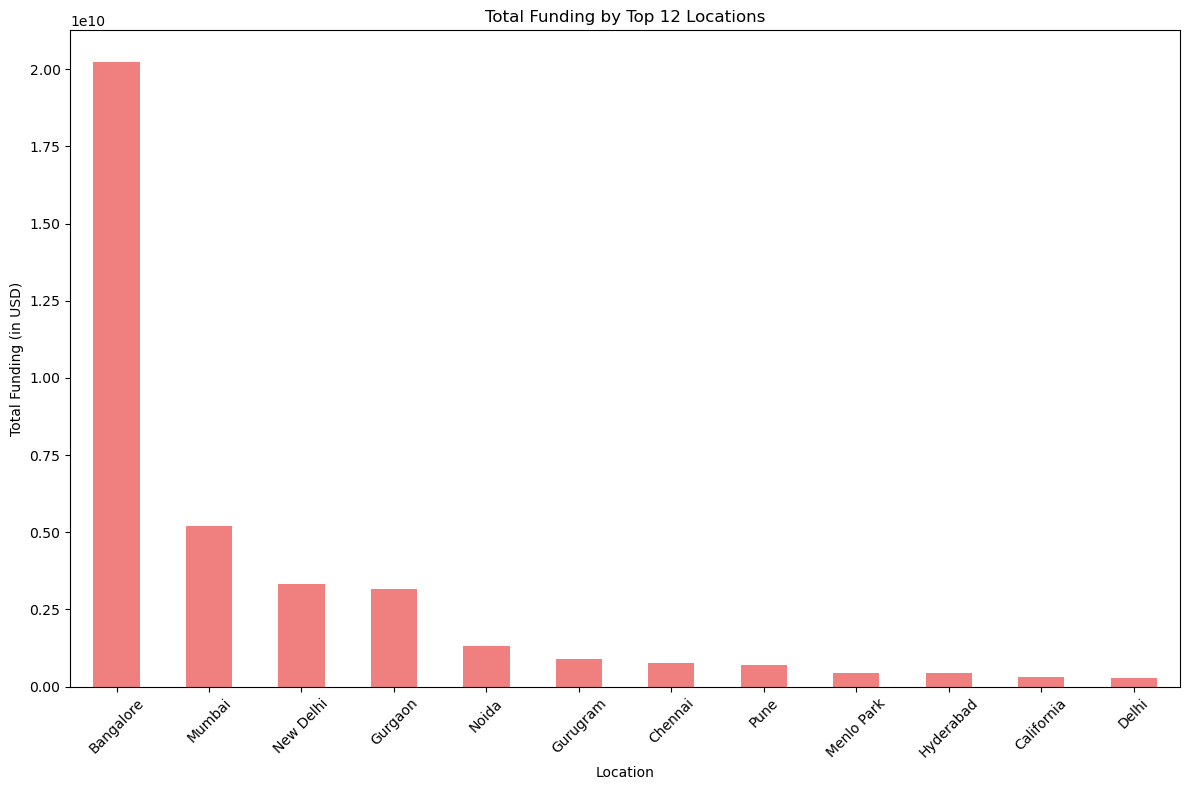

In [51]:
# Group by location and calculate total funding for each location
location_funding = sf_df.groupby('city_location')['amount_in_usd'].sum()

# Sort by total funding and select the top 12 locations
top_12_locations = location_funding.sort_values(ascending=False).head(12)

# Plot the total funding by location for the top 12 locations
top_12_locations.plot(kind='bar', figsize=(12, 8), color='lightcoral')
plt.title("Total Funding by Top 12 Locations")
plt.xlabel("Location")
plt.ylabel("Total Funding (in USD)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Who plays the main role in Indian Startups Ecosystem?

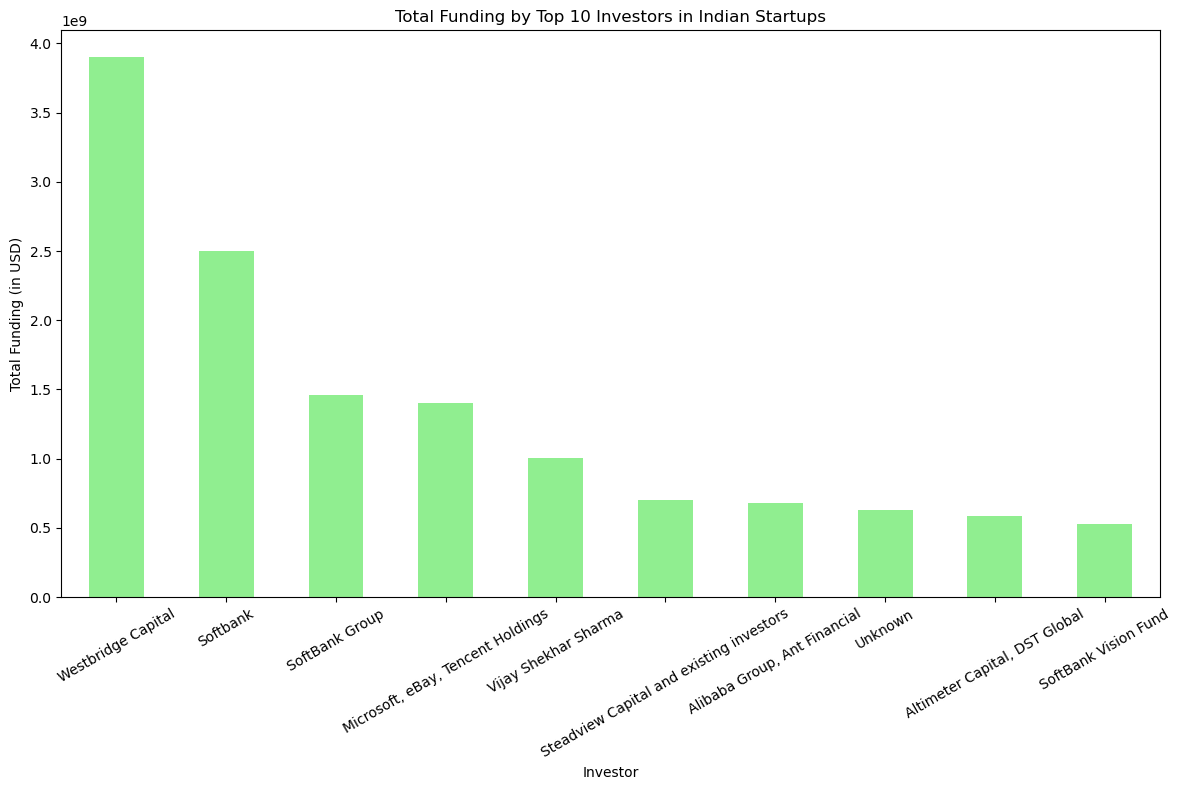

In [53]:
# Group by 'investor_name' and calculate total funding for each investor
investor_funding = sf_df.groupby('investors_name')['amount_in_usd'].sum()

# Sort by total funding and select the top 12 investors
top_10_investors = investor_funding.sort_values(ascending=False).head(10)

# Plot the total funding by investor for the top 10 investors
top_10_investors.plot(kind='bar', figsize=(12, 8), color='lightgreen')
plt.title("Total Funding by Top 10 Investors in Indian Startups")
plt.xlabel("Investor")
plt.ylabel("Total Funding (in USD)")
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

# What are the different Types of Funding for Startups?

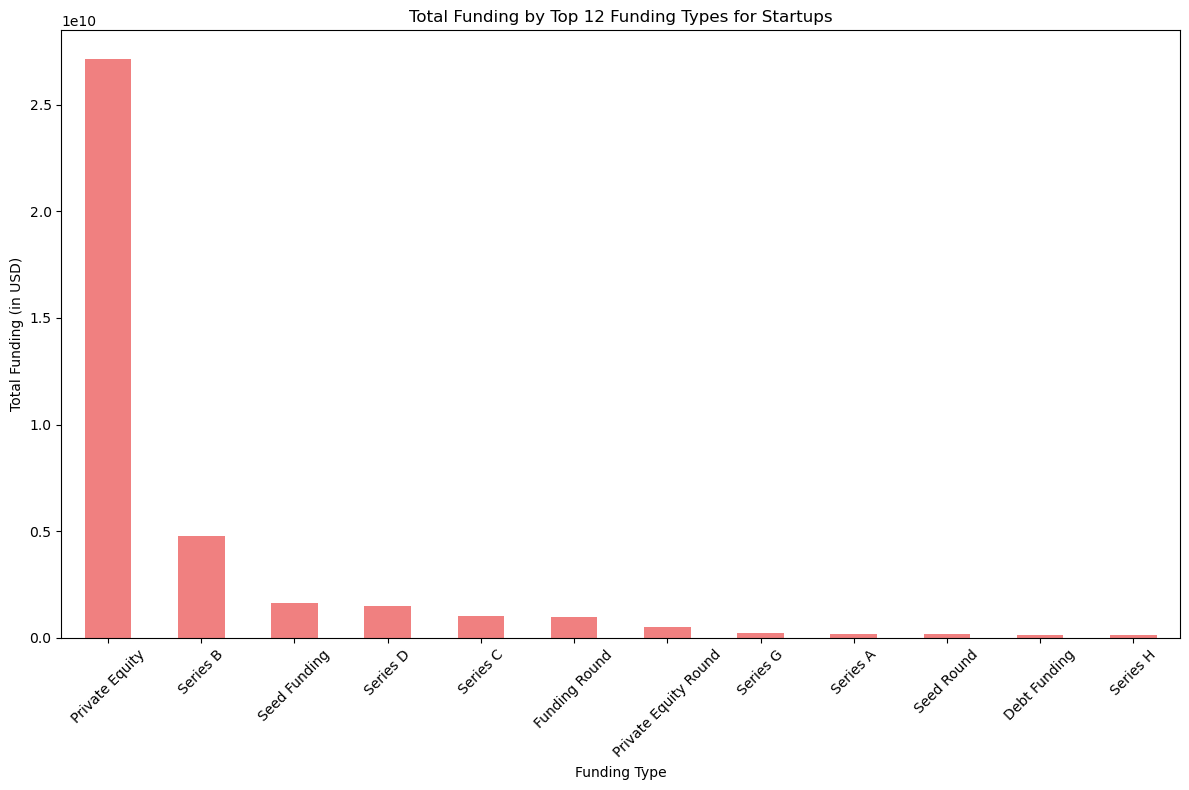

In [55]:
# Group by 'funding_type' and calculate the total funding for each type
funding_type_funding = sf_df.groupby('investment_type')['amount_in_usd'].sum()

# Sort by total funding and select the top 12 funding types
top_12_funding_types = funding_type_funding.sort_values(ascending=False).head(12)

# Plot the total funding by funding type for the top 12 funding types
top_12_funding_types.plot(kind='bar', figsize=(12, 8), color='lightcoral')
plt.title("Total Funding by Top 12 Funding Types for Startups")
plt.xlabel("Funding Type")
plt.ylabel("Total Funding (in USD)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Conclusions

In [ ]:
# 1) Trends in Total Funding:

# Total funding in USD was highest in 2017, marking it as the peak year for startup investments.

# Funding started very high in 2015 but experienced a significant decline, reaching its lowest point by 2020.

# 2) Investor Activity:

# The number of investors peaked between 2016 and 2017, with the highest activity in 2017.

# After 2017, investor participation began to decline steadily.

# 3) Startup Industry Preferences:

# The Consumer Internet sector is the most preferred industry for funding, receiving significantly higher investments compared to others.

# Other sectors like E-commerce and Transportation also attract funding but do not come close to Consumer Internet.

# 4) Geographical Distribution of Funding:

# Bangalore is the top location for startup funding, far surpassing other cities in terms of investment amounts.

# No other location comes close to Bangalore in terms of funding received.

# 5) Key Investors:

# Westbridge Capital and SoftBank are the most prominent investors in the Indian startup ecosystem, contributing significantly to funding.

# 5) Funding Types:

# Private Equity is the most preferred funding type for startups, indicating its dominance in the investment landscape.

# Conclusion
# Peak Investment Period: 2017 was the standout year for both total funding and investor activity.

# Sector Dominance: Consumer Internet is the most attractive sector for investors, followed by E-commerce and Transportation.

# Geographical Hub: Bangalore is the undisputed leader in startup funding, highlighting its importance as a startup hub in India.

# Major Players: Westbridge Capital and SoftBank are the key drivers of startup funding in India.

# Funding Preference: Private Equity is the most favored funding type, reflecting its significance in the startup ecosystem.


# <p style="background-color:green;font-family:newtimeroman;font-size:200%;color:white;text-align:center;border-radius:20px 20px;"><b>Startups Project</b></p>